In [11]:
%reset -f

import numpy  as np
import scipy  as sp
import pandas as pd

import statsmodels.api   as sm
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("HPRICE3.csv")

In [92]:
df[['rooms','lprice']].head()

,rooms,lprice
0,7,11.002100
1,6,10.596635
2,6,10.434115
3,5,11.065075
4,5,10.691945


In [94]:
df[['rooms','lprice']].describe()

,rooms,lprice
count,321.000000,321.000000
mean,6.585670,11.378118
std,0.901204,0.438174
min,4.000000,10.165852
25%,6.000000,11.082143
50%,7.000000,11.360939
75%,7.000000,11.695247
max,10.000000,12.611538


In [22]:
Xvar = df[['rooms']]
Yvar = df[['lprice']]
Xvar = sm.add_constant(Xvar)

reg = sm.OLS(Yvar, Xvar)

result = reg.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.32e-21
Time:                        09:20:12   Log-Likelihood:                -145.35
No. Observations:                 321   AIC:                             294.7
Df Residuals:                     319   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7985      0.157     62.254      0.0

In [45]:
np.cov(df['lprice'], df['rooms']) 

array([[0.19199684, 0.19480189],
       [0.19480189, 0.812169  ]])

In [46]:
np.cov(df['lprice'], df['rooms'])[1,0]

0.19480188933021805

In [47]:
np.cov(df['rooms'])

array(0.812169)

In [51]:
np.cov(df['rooms'])

array(0.812169)

In [58]:
b1 = np.cov(df['lprice'], df['rooms'])[1,0] / np.cov(df['rooms'])

print("the slope of rooms is ", b1)

the slope of rooms is  0.23985388334571905


In [59]:
b0 = np.mean(df['lprice']) - np.mean(df['rooms']) * b1
print("the intercept of regression equation is ", b0)

the intercept of regression equation is  9.798519525255918


In [67]:
df['yhat'] = b0 + b1 * df['rooms']

df['yhat'].describe()

count    321.000000
mean      11.378118
std        0.216157
min       10.757935
25%       11.237643
50%       11.477497
75%       11.477497
max       12.197058
Name: yhat, dtype: float64

<AxesSubplot:>

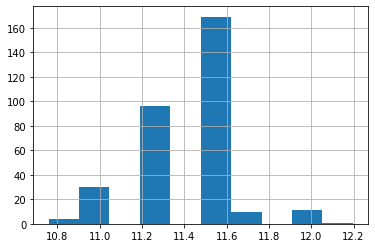

In [68]:
df['yhat'].hist()

In [69]:
df['uhat'] = df['lprice'] - df['yhat']

df['uhat'].describe()

count    3.210000e+02
mean     1.527335e-15
std      3.811468e-01
min     -1.311645e+00
25%     -2.259357e-01
50%     -2.644671e-02
75%      2.448242e-01
max      1.134041e+00
Name: uhat, dtype: float64

<AxesSubplot:>

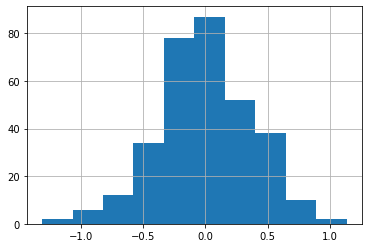

In [70]:
df['uhat'].hist()

In [110]:
TSS = np.cov(df['lprice']) * (len(df['lprice']) - 1)

print("the TSS of the regression is ", TSS)

the TSS of the regression is  61.438988950382985


In [111]:
RSS = np.cov(df['uhat']) * (len(df['lprice']) - 1)

var_u = RSS/(len(df['lprice']) - 1 - 1)

MSE = np.sqrt(var_u)

print("the RSS of the regression is ", RSS)
print("the variance of u_hat is ", var_u)
print("the MSE of the regression is ", MSE)

the RSS of the regression is  46.48731226592352
the variance of u_hat is  0.14572825161731512
the MSE of the regression is  0.3817436988573814


In [151]:
ESS = TSS - RSS

print("the ESS of the regression is ", ESS)

the ESS of the regression is  14.951676684459464


In [113]:
R2 = ESS / TSS

print("the R2 of the regression is ", R2)

the R2 of the regression is  0.2433581173761529


In [114]:
1 - RSS / TSS

0.24335811737615287

In [115]:
R2_a = 1 - (RSS/(len(df['lprice']) - 1 - 1)) / (TSS/(len(df['lprice']) - 1))

print("the adjusted R2 of the regression is ", R2_a)

the adjusted R2 of the regression is  0.24098619924880538


In [120]:
se_b1 = np.sqrt( var_u / ( np.cov(df['rooms']) * (len(df['rooms']) -1) ) )
se_b1

0.02367956297520075

In [121]:
t_b1 = b1 / se_b1
t_b1

10.129151606257025

In [123]:
sp.stats.t.sf(np.abs(t_b1), len(df['rooms']) - 1 - 1) * 2

4.320029628125147e-21

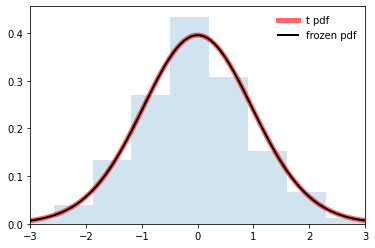

In [201]:
from scipy.stats import t

fig= plt.figure()

df = 30

x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), 100)

plt.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')

rv = t(df)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = t.rvs(df, size=1000)

plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)

plt.xlim(-3,3)

plt.show()

In [125]:
c_up = sp.stats.t.ppf(0.975, len(df['rooms']) - 1 - 1)
c_lo = sp.stats.t.ppf(0.025, len(df['rooms']) - 1 - 1)

b1_up = b1 + c_up * se_b1
b1_lo = b1 + c_lo * se_b1

print("the upper bound of population slope is ", b1_up)
print("the lower bound of population slope is ", b1_lo)

the upper bound of population slope is  0.28644172773256615
the lower bound of population slope is  0.19326603895887196


In [146]:
se_b0 = np. sqrt( var_u * ( 1 / len(df['rooms']) + np.power(np.mean(df['rooms']),2) / (np.cov(df['rooms']) * (len(df['rooms']) - 1)) ) )

se_b0

0.15739462862619946

In [147]:
t_b0 = b0 / se_b0
t_b0

62.25447215563291

In [148]:
sp.stats.t.sf(np.abs(t_b0), len(df['rooms']) - 1 - 1) * 2

1.5919185397026186e-180

In [149]:
b0_up = b0 + c_up * se_b0
b0_lo = b0 + c_lo * se_b0

print("the upper bound of population intercept is ", b0_up)
print("the lower bound of population intercept is ", b0_lo)

the upper bound of population intercept is  10.108182185561024
the lower bound of population intercept is  9.488856864950812


In [162]:
log_lh = np.sum(np.log(sp.stats.norm.pdf(df['uhat'], loc=0, scale=MSE)))
print("the log likelihood of regression is ", log_lh)

the log likelihood of regression is  -145.35439421064217


In [163]:
AIC = -1 * log_lh *2 + 2 * 2
print("the AIC of regression is ", AIC)

the AIC of regression is  294.70878842128434


In [164]:
BIC = -1 * log_lh *2 + 2 * np.log(len(df['rooms']))
print("the AIC of regression is ", BIC)

the AIC of regression is  302.2516706675444


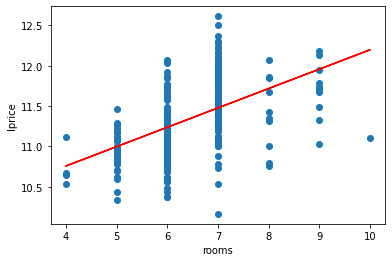

In [174]:
fig1 = plt.figure()

plt.scatter(df['rooms'], df['lprice'])
plt.plot(df['rooms'], df['yhat'], color='red')
plt.xlabel("rooms")
plt.ylabel("lprice")

plt.show()

In [178]:
Fval_num = (TSS - RSS)/(1)
Fval_den = RSS/(len(df['lprice']) -1 -1)
Fval = Fval_num / Fval_den

print("the default F value of regression is ", Fval)

the default F value of regression is  102.59971226253934


In [179]:
Pval_F = sp.stats.f.sf(Fval, 1, len(df['lprice']) -1 -1)

print("the p value for default F statistic is ", Pval_F)

the p value for default F statistic is  4.320029628124904e-21


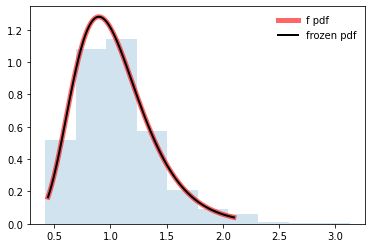

In [195]:
from scipy.stats import f

fig, ax = plt.subplots(1, 1)
dfn, dfd = 30, 50

x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label='f pdf')

rv = f(dfn, dfd)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = f.rvs(dfn, dfd, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

In [154]:
def cal_cost(b0, b1, X, y):
    
    n = len(y)
    
    yhat = b0 + b1 * X
    
    cost = np.sum(np.square(y - yhat))
    
    return cost

In [ ]:
def gradient_descent(X, y, b0, b1,learning_rate=0.001, iterations=1000):
    
    m = len(y)
    
    cost_history = np.zeros(iterations)
    
    _history = np.zeros((iterations,2))
    
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history